In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
np.random.seed(123)

In [4]:
X1 = np.random.normal(loc=[0,-10], size=(100,2))
X2 = np.random.normal(loc=[-10, 0], size=(100,2))
X3 = np.random.normal(loc=[0, 0], size=(100,2))
X = np.vstack((X1,X2,X3))
y = np.array([1]*100 + [2]*100 + [3]*100)

In [5]:
k_means = KMeans(n_clusters=3)


In [6]:
clusters = k_means.fit_predict(X)

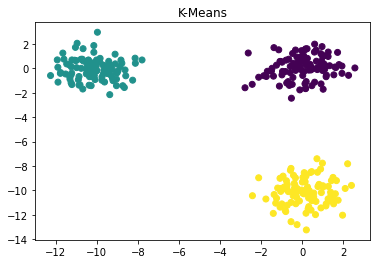

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.title('K-Means')
plt.show()

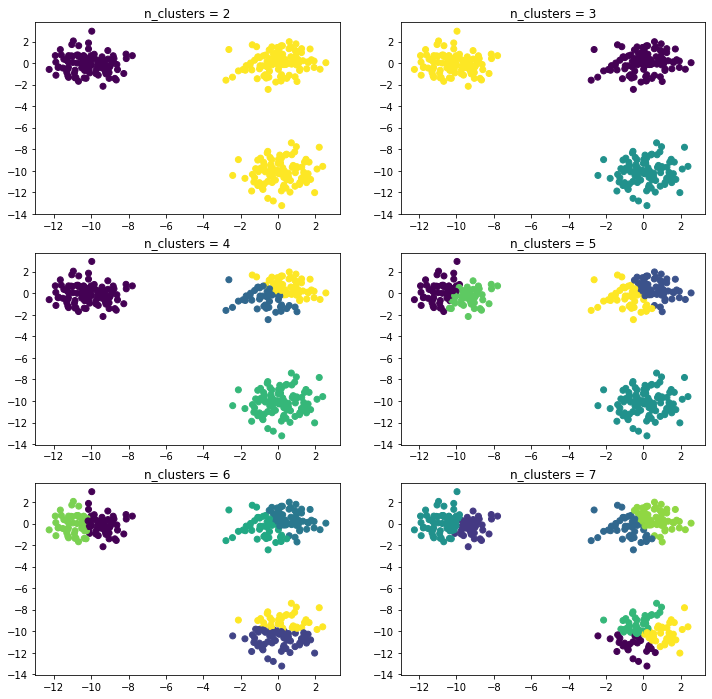

In [8]:
plt.figure(figsize=(12, 12))
for n_c in range(2, 8):
  k_means = KMeans(n_clusters=n_c)
  clusters = k_means.fit_predict(X)
  plt.subplot(3, 2, n_c-1)
  plt.scatter(X[:, 0], X[:, 1], c=clusters)
  plt.title('n_clusters = {}'.format(n_c))
plt.show()

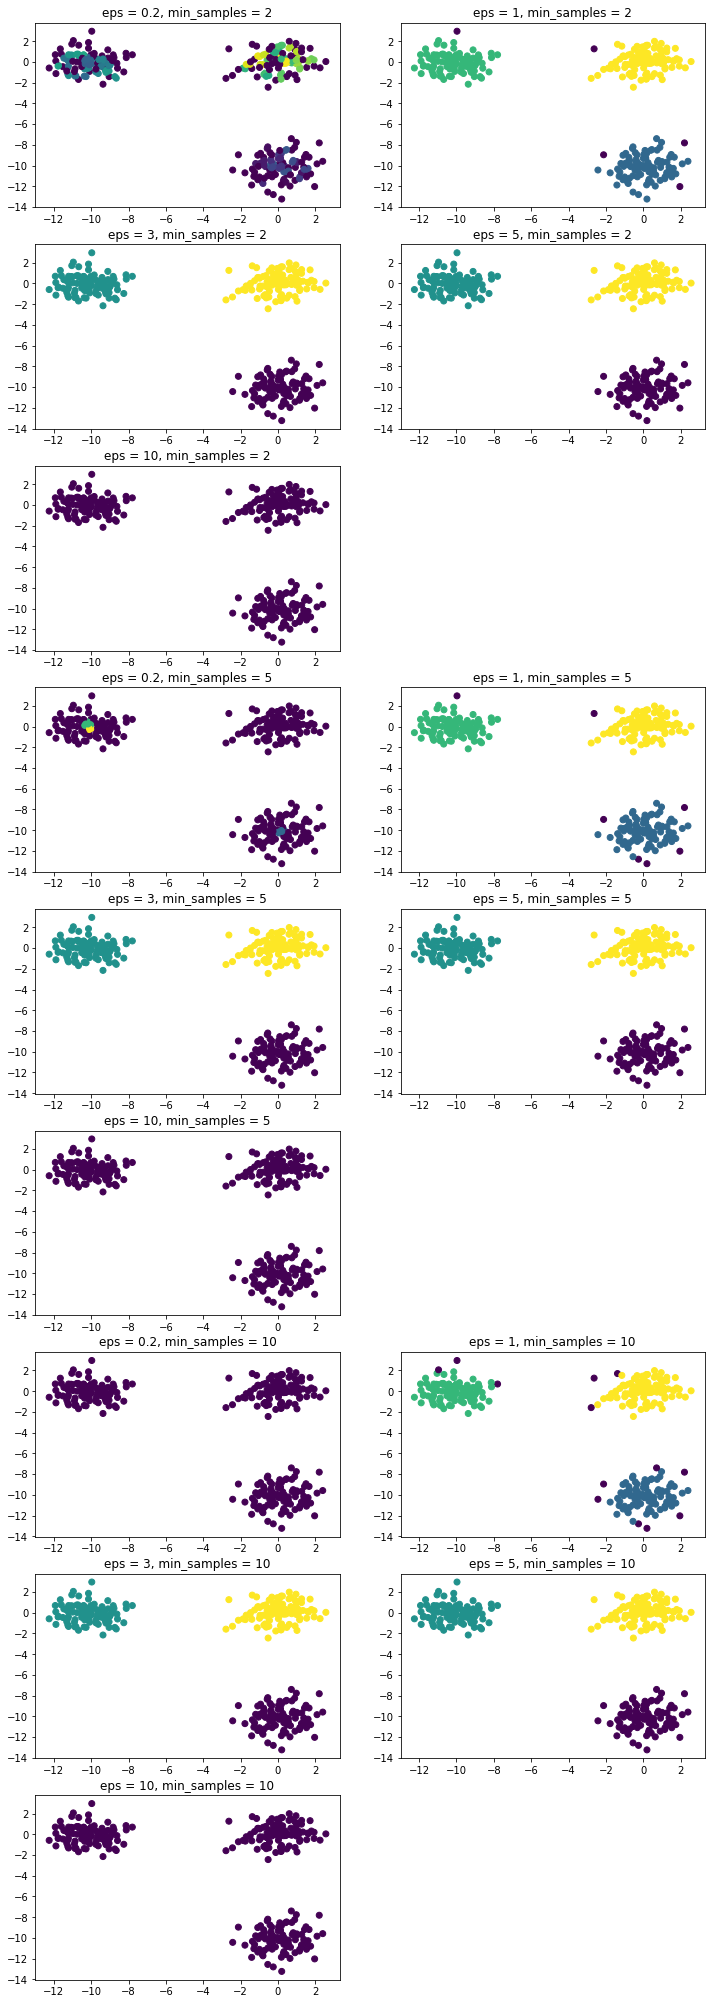

In [9]:
from sklearn.cluster import DBSCAN
plt.figure(figsize=(12, 36))
i = 1
for sample in [2, 5, 10]:
  for e in [0.2, 1, 3, 5, 10]:
    dbscan = DBSCAN(eps=e, min_samples=sample)
    clusters = dbscan.fit_predict(X)
    plt.subplot(9, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=clusters)
    plt.title('eps = {}, min_samples = {}'.format(e, sample))
    i += 1
  i += 1
plt.show()

In [10]:
from sklearn import datasets

In [11]:
n_samples = 1500

In [12]:
X = datasets.make_circles(n_samples=n_samples, factor = 0.5, noise = 0.05)

In [13]:
X = X[0]

In [14]:
X.shape

(1500, 2)

In [15]:
dbscan = DBSCAN(eps=0.1, min_samples=5)

In [16]:
clusters = dbscan.fit_predict(X)

Text(0.5, 1.0, 'DBSCAN')

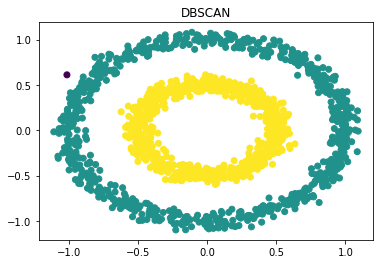

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.title('DBSCAN')


In [18]:
k_means = KMeans(n_clusters=2)

In [19]:
clusters = k_means.fit_predict(X)

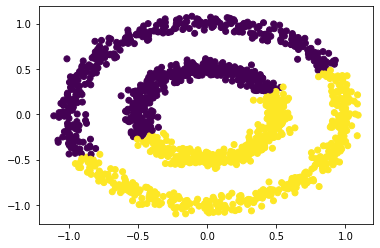

In [20]:
plt.scatter(X[:, 0], X[:, 1], c = clusters)

In [21]:
from sklearn.datasets import load_digits

In [22]:
digits = load_digits()

In [23]:
X, y = digits['data'], digits['target']

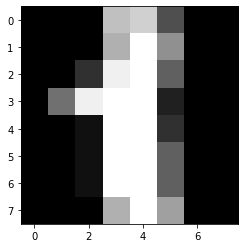

In [24]:
plt.imshow(X[1].reshape(8, 8), cmap='gray')

In [25]:
km = KMeans(n_clusters=10)

In [26]:
clusters = km.fit_predict(X)

In [27]:
pred = np.zeros(X.shape[0])

In [28]:
for i in range(10):
  bc = np.bincount(y[clusters == i])
  pred[clusters == i] = bc.argmax()
  

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y, pred)

0.7957707289927657

In [31]:
incorrect_indeces = np.where(np.logical_and(pred == 0, y!=0))[0]

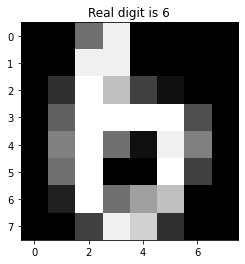

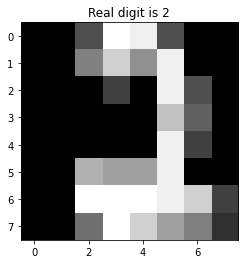

In [32]:
for i in range(2):
  plt.imshow(X[incorrect_indeces[i]].reshape(8, 8), cmap='gray')
  plt.title('Real digit is {}'.format(y[incorrect_indeces[i]]))
  plt.show()

In [33]:
correct_indeces = np.where(np.logical_and(pred == 0, y == 0))[0]

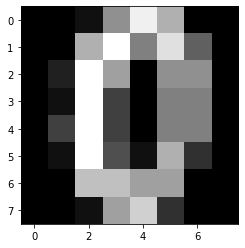

In [34]:
for i in range(2):
  plt.imshow(X[correct_indeces[i]].reshape(8, 8), cmap='gray')

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2)

In [37]:
digits_2d = pca.fit_transform(digits['data'])

In [38]:
plt.figure(figsize=(13, 10))

<Figure size 936x720 with 0 Axes>

<Figure size 936x720 with 0 Axes>

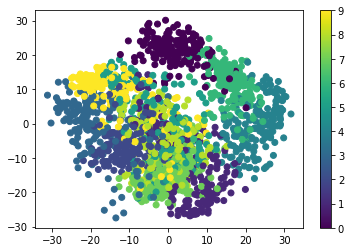

In [39]:
plt.scatter(digits_2d[:, 0], digits_2d[:, 1], c=y)
plt.colorbar()
plt.show()

In [40]:
plt.figure(figsize = (13, 10))

<Figure size 936x720 with 0 Axes>

<Figure size 936x720 with 0 Axes>

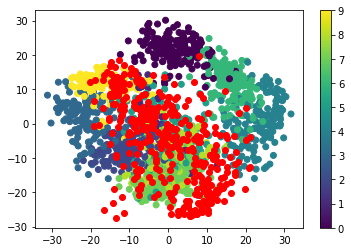

In [41]:
plt.scatter(digits_2d[y==pred, 0], digits_2d[y == pred, 1], c = y[y == pred])
plt.colorbar()
plt.scatter(digits_2d[y!=pred, 0], digits_2d[y!=pred, 1], c='red')
plt.show()

In [42]:
from sklearn.manifold import TSNE

In [43]:
tsne = TSNE(n_components=2)

In [44]:
digits_2d = tsne.fit_transform(digits['data'])

In [45]:
plt.figure(figsize = (13, 10))

<Figure size 936x720 with 0 Axes>

<Figure size 936x720 with 0 Axes>

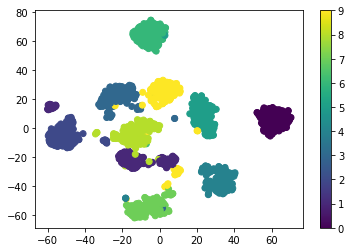

In [46]:
plt.scatter(digits_2d[:, 0], digits_2d[:, 1], c = y)
plt.colorbar()
plt.show()

In [47]:
tsne = TSNE(n_components=3)

In [48]:
digits_3d = tsne.fit_transform(digits['data'])

In [49]:
from mpl_toolkits.mplot3d import Axes3D

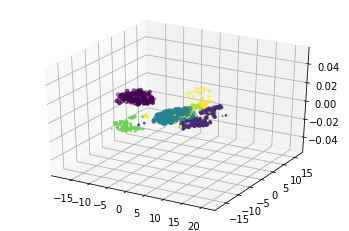

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(digits_3d[:, 0], digits_3d[:,1], digits_3d[:, 2], c=y)